# In this project, I will be creating a simple diabetes prediction model based on variables present in the dataset found on kaggle https://www.kaggle.com/andrewmvd/early-diabetes-classification

## My Analysis

Here is the approach I took for this project:

1. Data Processing

2. Exploratory Data Analysis

3. Methods

4. Results & Discussion

### 1. Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_diabetes = pd.read_csv("diabetes_data.csv", sep = ";")

In [3]:
df_diabetes.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
print(df_diabetes.shape)
print(df_diabetes["class"].unique())

(520, 17)
[1 0]


### There are 520 rows and 16 predictor columns for the diabetes class. The diabetes class takes value 1 and 0. Next, I will convert the categorical gender variable to a binary variable

In [5]:
df_diabetes["gender"] = df_diabetes["gender"].apply({"Male":1, "Female":0}.get)
df_diabetes.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Next, we will split the dataset into training and test datasets and utilize various algorithms to predict the response variable class

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = df_diabetes[df_diabetes.columns[:-1]]
Y = df_diabetes[df_diabetes.columns[-1]]

In [8]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, 
                                                    Y, 
                                                    test_size=0.4, 
                                                    random_state=101)

## 2. EDA

### Next, I will conduct some basic exploratory data analysis to find out the gender and age profile of our dataset as well as our response variable "class"

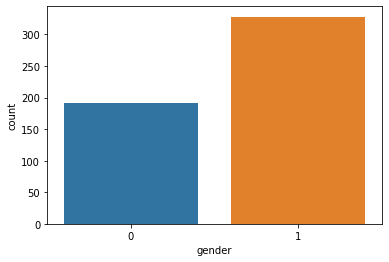

In [10]:
sns.countplot(x="gender", data=df_diabetes)

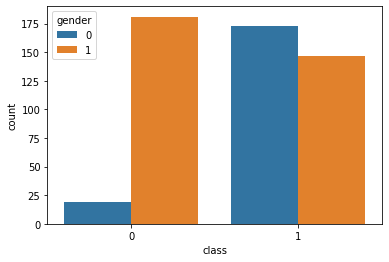

In [11]:
sns.countplot(x="class", hue="gender", data=df_diabetes)

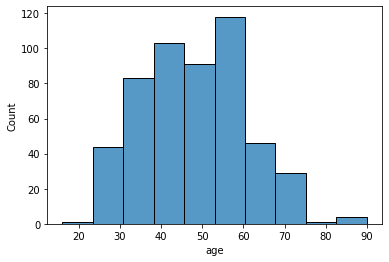

In [12]:
sns.histplot(df_diabetes["age"], kde=False, bins=10)

### From initial analysis, we have a majority male dataset but have more females diagnosed with diabetes. Additionally, the histogram shows that we have a majority age group of 50-60 years old

## 3. Methods

### Model 1: Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluate Model 1

In [15]:
predictions_log = logmodel.predict(X_test)

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [17]:
print(classification_report(Y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        83
           1       0.93      0.91      0.92       125

    accuracy                           0.91       208
   macro avg       0.90      0.91      0.91       208
weighted avg       0.91      0.91      0.91       208



In [18]:
print(confusion_matrix(Y_test, predictions_log))

[[ 75   8]
 [ 11 114]]


In [19]:
f1_log = f1_score(Y_test, predictions_log)
print(f1_log)

0.9230769230769231


In [20]:
logmodel.coef_

array([[ 0.01826867, -1.50151764,  1.55667089,  1.81173067,  0.45585132,
         0.34315674,  0.48531488,  0.69717772,  0.74173383, -0.98869809,
         1.01310463, -0.4444706 ,  0.32182692, -0.28119859, -0.28727823,
         0.17088906]])

### Model 2: K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Evaluate Model 2

In [23]:
predictions_knn1 = knn.predict(X_test)

In [24]:
print(classification_report(Y_test, predictions_knn1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        83
           1       0.97      0.92      0.94       125

    accuracy                           0.93       208
   macro avg       0.93      0.94      0.93       208
weighted avg       0.93      0.93      0.93       208



In [25]:
print(confusion_matrix(Y_test, predictions_knn1))

[[ 79   4]
 [ 10 115]]


In [26]:
f1_knn1 = f1_score(Y_test, predictions_knn1)
print(f1_knn1)

0.9426229508196722


### Model 3: K Nearest Neighbors with tuning

In [27]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

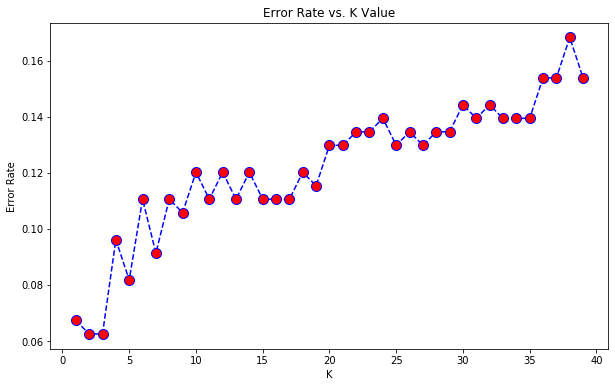

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Evaluate Model 3

In [30]:
predictions_knn2 = knn.predict(X_test)

In [31]:
print(classification_report(Y_test, predictions_knn2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        83
           1       0.99      0.90      0.95       125

    accuracy                           0.94       208
   macro avg       0.93      0.95      0.94       208
weighted avg       0.94      0.94      0.94       208



In [32]:
print(confusion_matrix(Y_test, predictions_knn2))

[[ 82   1]
 [ 12 113]]


In [33]:
f1_knn2 = f1_score(Y_test, predictions_knn2)
print(f1_knn2)

0.9456066945606694


### Model 4: Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluate Model 4

In [36]:
predictions_dt = dtree.predict(X_test)

In [37]:
print(classification_report(Y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        83
           1       0.97      0.95      0.96       125

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.95      0.95      0.95       208



In [38]:
print(confusion_matrix(Y_test, predictions_dt))

[[ 79   4]
 [  6 119]]


In [39]:
f1_dt = f1_score(Y_test, predictions_dt)
print(f1_dt)

0.9596774193548387


### Model 5: Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluate Model 5

In [42]:
predictions_rfc = rfc.predict(X_test)

In [43]:
print(classification_report(Y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.96      0.98      0.97       125

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208



In [44]:
print(confusion_matrix(Y_test, predictions_rfc))

[[ 78   5]
 [  3 122]]


In [45]:
f1_rfc = f1_score(Y_test, predictions_rfc)
print(f1_rfc)

0.9682539682539683


In [46]:
data = {"Method":["Logistic Regression", "KNN1", "KNN2", "Decision Trees", "Random Forest"],
       "f1-score":[f1_log, f1_knn1, f1_knn2, f1_dt, f1_rfc]}

results = pd.DataFrame(data)
print(results)

                Method  f1-score
0  Logistic Regression  0.923077
1                 KNN1  0.942623
2                 KNN2  0.945607
3       Decision Trees  0.959677
4        Random Forest  0.968254


## 4. Results & Discussion

### I chose to utilize f1-scores to determine the most accurate model in predicting diabetes in a particular patient. f1-scores take into account both precision and recall to determine the percentage of positive predictions that were determined to be correct. In an issue such as diabetes, the false negative is highly critical.

### Based on the respective f1 scores, it appears that the Random Forest Algorithm is the most suitable in predicting diabetes. Lets visualize the important variables

Text(0, 0.5, 'Feature')

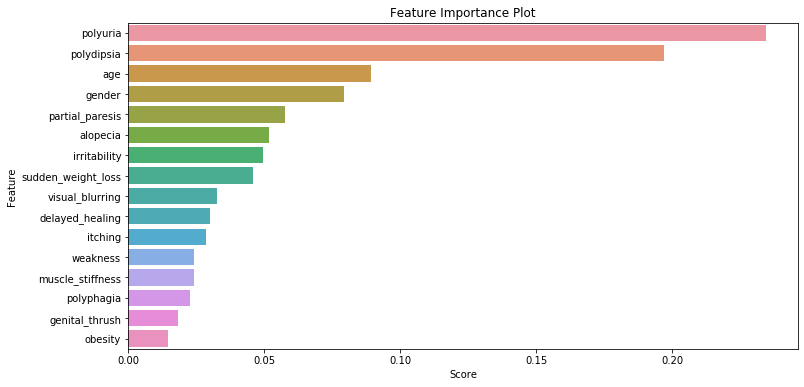

In [47]:
plt.figure(figsize=(12,6))
feature_imp = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_plot = sns.barplot(x = feature_imp, y = feature_imp.index)
feature_plot.set_title("Feature Importance Plot")
feature_plot.set_xlabel("Score")
feature_plot.set_ylabel("Feature")

### Here, we see that polydipsia and polyuria are the 2 most important conditions which help to predict a person having diabetes. Polydispia is the medical term for experiencing extreme thirst while Polyuria is a condition where a person has excessive urination. Cross-referencing this with online research, these are 2 particular conditions which are found to be early indications of a person having diabetes. Thus, its importance here is justified.